In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore
import os

In [3]:
data2 = pd.read_csv('..\..\Dataset\dataset_simplificado.csv', delimiter=';')

In [4]:
data2

,DT_NOTIFICACAO,NM_MUNICIPIO,REGISTROS
0,2013-12-01,Altair,2
1,2013-12-01,Americana,16
2,2013-12-01,Analândia,1
3,2013-12-01,Andradina,2
4,2013-12-01,Aparecida,1
...,...,...,...
53339,2024-02-01,Viradouro,35
53340,2024-02-01,Vista Alegre do Alto,35
53341,2024-02-01,Votorantim,226
53342,2024-02-01,Votuporanga,1460


In [5]:
#le o dataset de controle de trafego na Web em LA, pegando apenas 3 colunas especificas do arquivo e converte a colunas de "Date" para formato apropriado
data = pd.read_csv(os.path.join('..\..\Dataset\dataset_simplificado.csv'), delimiter=';',
                   parse_dates=['DT_NOTIFICACAO']).loc[:, ['DT_NOTIFICACAO', 'NM_MUNICIPIO', 'REGISTROS']]

#dados organizados de acordo com a data e tipo de dispositivo e soma os valores da coluna Sessions
#data = data.groupby(['DT_NOTIFICACAO', 'NM_MUNICIPIO'], as_index=False)['REGISTROS'].mean()

#cria nova tabela contendo datas que não tiveram sessoes para o dispositivo tablet, adicionando manualmente os valores 0 para corrigir as informações faltantes
#fixes = pd.DataFrame({'Date': pd.to_datetime(['2016-12-01', '2018-10-13']), 
 #                     'Device Category': ['tablet', 'tablet'] ,
  #                    'Sessions': [np.nan, np.nan]})

# junta os dados corrigidos à tabela  original concatenando as linhas e garantindo que os itens foram reorganizados, ignorando os indices antigos
#data = pd.concat([data, fixes], axis=0, ignore_index=True)

In [6]:
data

,DT_NOTIFICACAO,NM_MUNICIPIO,REGISTROS
0,2013-12-01,Altair,2
1,2013-12-01,Americana,16
2,2013-12-01,Analândia,1
3,2013-12-01,Andradina,2
4,2013-12-01,Aparecida,1
...,...,...,...
53339,2024-02-01,Viradouro,35
53340,2024-02-01,Vista Alegre do Alto,35
53341,2024-02-01,Votorantim,226
53342,2024-02-01,Votuporanga,1460


In [7]:
data.head(50)


,DT_NOTIFICACAO,NM_MUNICIPIO,REGISTROS
0,2013-12-01,Altair,2
1,2013-12-01,Americana,16
2,2013-12-01,Analândia,1
3,2013-12-01,Andradina,2
4,2013-12-01,Aparecida,1
5,2013-12-01,Araçatuba,3
6,2013-12-01,Araraquara,1
7,2013-12-01,Araras,1
8,2013-12-01,Assis,1
9,2013-12-01,Atibaia,1


Divisão dos dados em treino e validação

In [8]:
#intervalo de dados de treino
train = data.loc[data['DT_NOTIFICACAO'] < '2019-01-01']
#intervalo de dados de validação
valid = data.loc[(data['DT_NOTIFICACAO'] >= '2019-01-01') & (data['DT_NOTIFICACAO'] < '2019-04-01')]
#conta quantos dias distintos tem no conjunto de validação 
# h é a quantidade timestamps(pontos especificos na linha do tempo) que se quer prever no futuro
h = valid['DT_NOTIFICACAO'].nunique()

In [12]:
#importação da biblioteca utilizada para criar e manipular series temporais
from darts import TimeSeries # type: ignore
#retorna uma lista de todos os dispositivos únicos, para saber quantas series temporais criar
series_names = train['NM_MUNICIPIO'].unique()
#cria uma serie temporal a partir de um dataframe. 
# Cada série temporal representa a evolução de um valor ao longo do tempo para um grupo específico (neste caso, um tipo de dispositivo)
train_series = TimeSeries.from_group_dataframe(train, time_col='DT_NOTIFICACAO', value_cols=['REGISTROS'], group_cols=['NM_MUNICIPIO'], freq='D', fill_missing_dates=True, fillna_value=0.)

In [13]:
from darts.models import KalmanForecaster # type: ignore


C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
#cria lista vazia para armazenar as previsões
preds = list()

print(len(train_series))

#Itera sobre train_series, onde i é o índice da série e series é a série temporal atual.
for i, series in enumerate(train_series):

    #print(series)
    #ria uma instância do modelo KalmanForecaster com dim_x=100
    # em que o parâmetro dim_x especifica a dimensão do estado interno do filtro, neste caso, 100.
    model = KalmanForecaster(dim_x=645)
    #ajusta o modelo à serie temporal atual. Modelo aprende a partir de dados historicos
    model.fit(series=series)
    #faz previsão para o h. pd_dataframe() converte o resultado da previsao em um dataframe do pandas
    #reset_index() refefine o indice do dataframe
    p = model.predict(h).pd_dataframe().reset_index()
    #adidiona ujma coluna ao dataframe de previsoes com o nome do dispositivo correspondente a previsao
    p['NM_MUNICIPIO'] = series_names[i]
    #adiciona o dataframe de previsoes p à lista preds
    preds.append(p)
# pd.concat(preds, axis=0, ignore_index=True) - Combina todos os DataFrames de previsões armazenados na lista preds em um único DataFrame. axis=0 indica que a concatenação deve ser feita ao longo das linhas (empilhando os DataFrames verticalmente). ignore_index=True garante que o índice do DataFrame resultante seja uma nova sequência numérica contínua, ignorando os índices originais
# .rename(columns={'Sessions': 'Predicted'}) - Renomeia a coluna 'Sessions' para 'Predicted' para refletir que esses valores são previsões feitas pelo modelo, em vez dos valores reais de sessões.
preds = pd.concat(preds, axis=0, ignore_index=True).rename(columns={'NM_MUNICIPIO': 'Predicted'})

645


In [47]:
preds

component,Date,Predicted,Device Category
0,2019-01-01,1.005647e+06,desktop
1,2019-01-02,1.079619e+06,desktop
2,2019-01-03,9.361675e+05,desktop
3,2019-01-04,8.505858e+05,desktop
4,2019-01-05,1.662196e+05,desktop
...,...,...,...
265,2019-03-27,6.023314e+04,tablet
266,2019-03-28,5.727198e+04,tablet
267,2019-03-29,5.471245e+04,tablet
268,2019-03-30,5.079694e+04,tablet


In [48]:
#junta os dados r5eais com os dados previstos
preds = preds.merge(valid, on=['Date', 'Device Category'], how='left')
    
    
#usa o MAPE para medir o quao distantes estao os valores dos reais
from sklearn.metrics import mean_absolute_percentage_error # type: ignore
mean_absolute_percentage_error(preds['Sessions'], preds['Predicted'])

0.31473165303910977

C:\Users\asawoi\AppData\Local\Temp\ipykernel_28396\2564824918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_.rename(columns={'Sessions': 'Actual'}, inplace=True)
C:\Users\asawoi\AppData\Local\Temp\ipykernel_28396\2564824918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_.rename(columns={'Sessions': 'Actual'}, inplace=True)
C:\Users\asawoi\AppData\Local\Temp\ipykernel_28396\2564824918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

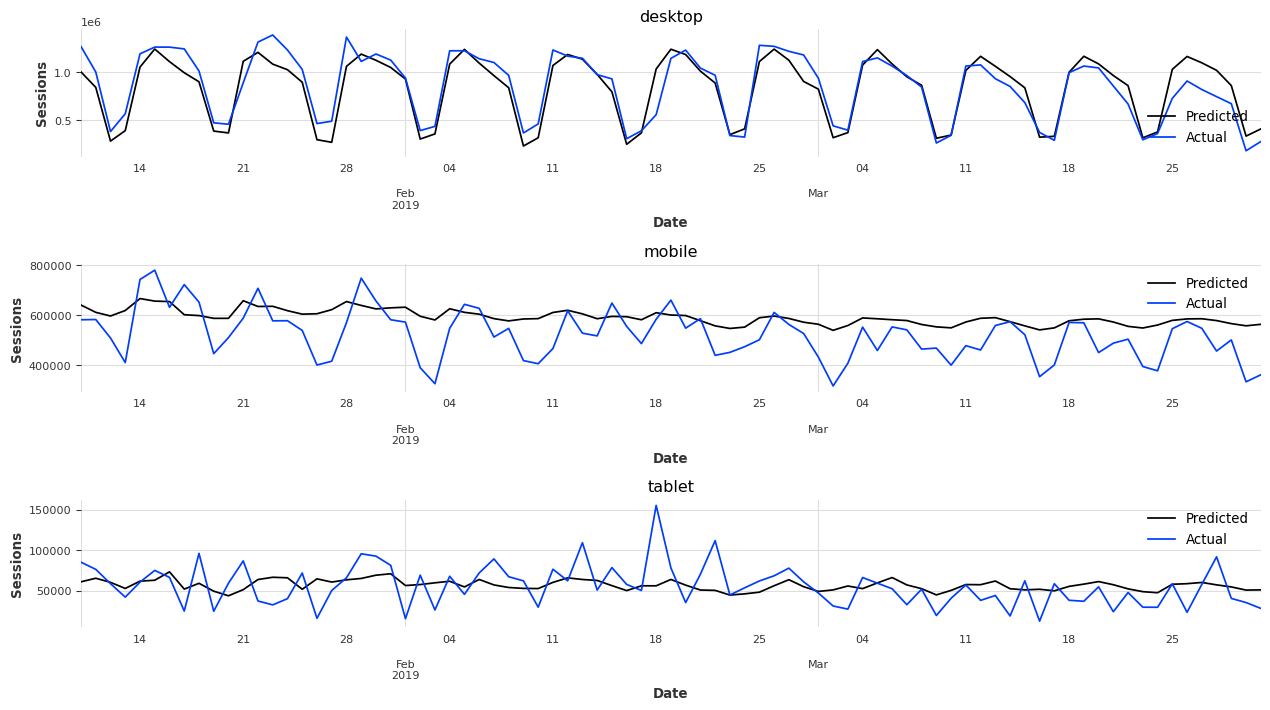

In [49]:
#cria os 3 graficos
fig,ax = plt.subplots(3,1,figsize=(1280/96, 720/96), dpi=96)
#filtrar as previsões para considerar apenas as datas a partir de 10 de janeiro de 2019. Isso pode ser útil para focar em um período específico de validação.
preds_ = preds[preds['Date'] >= '2019-01-10']
for ax_, device in enumerate(preds_['Device Category'].unique()):
    p_ = preds_.loc[preds_['Device Category'] == device]
    p_.rename(columns={'Sessions': 'Actual'}, inplace=True)
    p_.plot(x='Date', y=['Predicted', 'Actual'], ax=ax[ax_], title=device)
    ax[ax_].set_xlabel('Date')
    ax[ax_].set_ylabel('Sessions')
fig.tight_layout()

In [50]:
from darts.models import KalmanForecaster

preds = list()
for i, series in enumerate(train_series):
    model = KalmanForecaster(dim_x=100)
    model.fit(series=series)
    p = model.predict(h, num_samples=100)
    p = [p.quantile_df(q) for q in [0.05, 0.5, 0.95]]
    p = pd.concat(p, axis=1).reset_index()
    p['Device Category'] = series_names[i]
    preds.append(p)
preds = pd.concat(preds, axis=0, ignore_index=True)
preds = preds.merge(valid, on=['Date', 'Device Category'], how='left')

C:\Users\asawoi\AppData\Local\Temp\ipykernel_28396\4125556309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_.rename(columns={'Sessions': 'Actual', 'Sessions_0.5': 'Predicted'}, inplace=True)
C:\Users\asawoi\AppData\Local\Temp\ipykernel_28396\4125556309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_.rename(columns={'Sessions': 'Actual', 'Sessions_0.5': 'Predicted'}, inplace=True)
C:\Users\asawoi\AppData\Local\Temp\ipykernel_28396\4125556309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

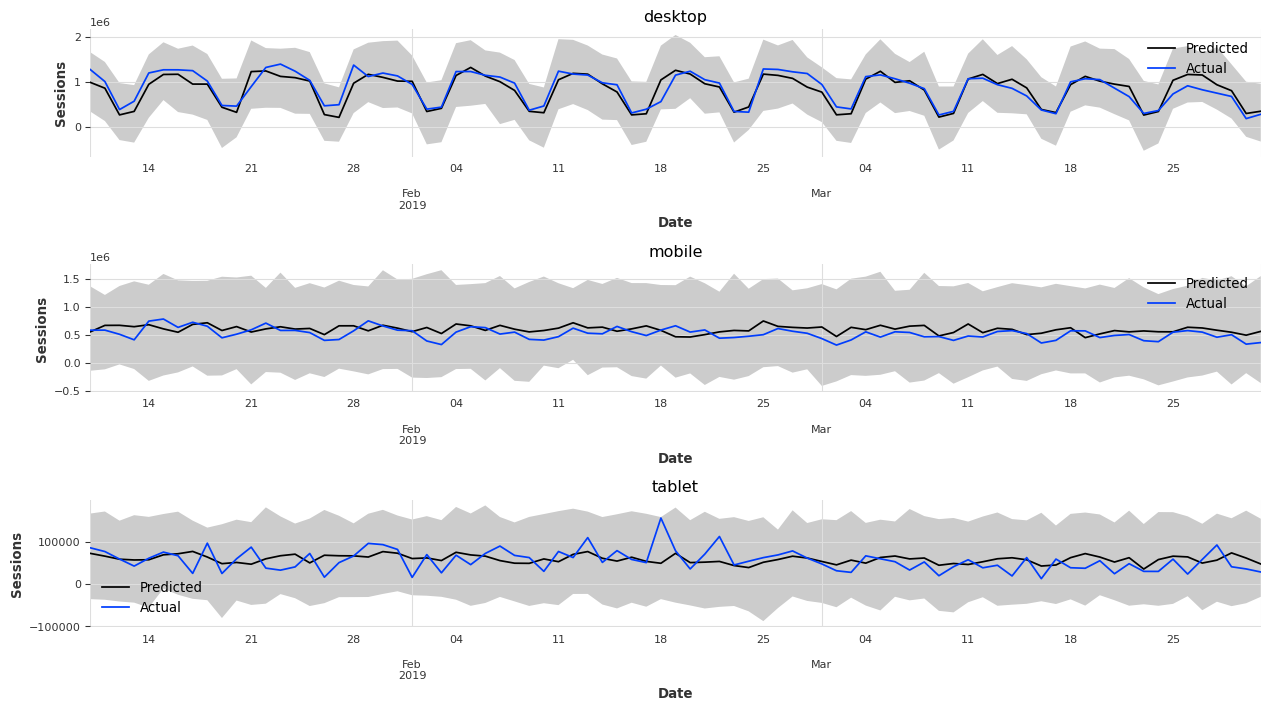

In [51]:
fig,ax = plt.subplots(3,1,figsize=(1280/96, 720/96), dpi=96)
preds_ = preds[preds['Date'] >= '2019-01-10']
for ax_, device in enumerate(preds_['Device Category'].unique()):
    p_ = preds_.loc[preds_['Device Category'] == device]
    p_.rename(columns={'Sessions': 'Actual', 'Sessions_0.5': 'Predicted'}, inplace=True)
    ax[ax_].fill_between(p_['Date'], p_['Sessions_0.05'], p_['Sessions_0.95'], alpha=0.2)
    p_.plot(x='Date', y=['Predicted', 'Actual'], ax=ax[ax_], title=device)
    ax[ax_].set_xlabel('Date')
    ax[ax_].set_ylabel('Sessions')
fig.tight_layout()

In [52]:
from sklearn.metrics import mean_pinball_loss
for q in [0.05, 0.5, 0.95]:
    print(f'Pinball loss at {q}: {mean_pinball_loss(preds["Sessions"], preds[f"Sessions_{q}"])}')

Pinball loss at 0.05: 268637.8143807489
Pinball loss at 0.5: 51956.13305713162
Pinball loss at 0.95: 271511.7489896879
